In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

In [3]:
avo = pd.read_csv('avocado.csv').drop(columns='Unnamed: 0')
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [34]:
avo['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [42]:
convt = avo[avo['type'] == 'conventional']
convt.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [41]:
org = avo[avo['type'] == 'organic']
org.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9126,2015-12-27,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,organic,2015,Albany
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0,organic,2015,Albany
9128,2015-12-13,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,organic,2015,Albany
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0,organic,2015,Albany
9130,2015-11-29,1.94,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0,organic,2015,Albany


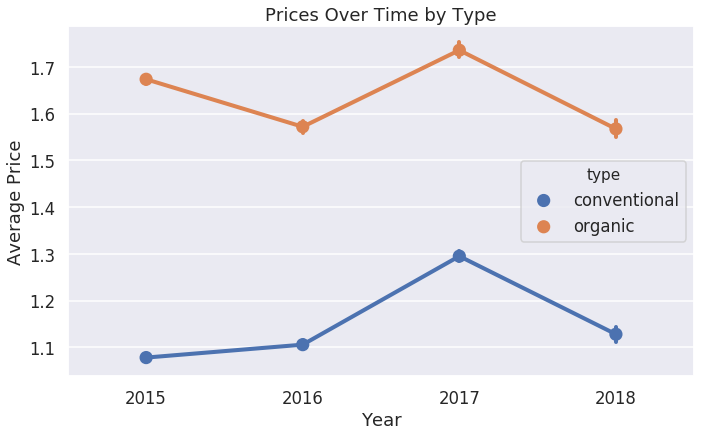

In [61]:
plt.figure(figsize=[10, 6])
sns.pointplot(x='year', y='AveragePrice', hue='type', data=avo);
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Prices Over Time by Type');

Used a point plot to see the change in prices over time of each type of avocado.

In [72]:
totUS = avo[avo['region'] == 'TotalUS']
totUS.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2652,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
2653,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS
2654,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS
2655,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS
2656,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS


In [84]:
avoAvg = pd.merge(avo, avo.groupby('region').agg({'AveragePrice':'mean'}), how='left', on='region')
avoAvg.head()

,Date,AveragePrice_x,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePrice_y
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1.561036
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,1.561036
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,1.561036
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1.561036
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,1.561036


In [91]:
avgReg = avo.groupby('region').agg({'AveragePrice':'mean'})
avgReg

,AveragePrice
region,
Albany,1.561036
Atlanta,1.337959
BaltimoreWashington,1.534231
Boise,1.348136
Boston,1.530888
BuffaloRochester,1.516834
California,1.395325
Charlotte,1.606036
Chicago,1.556775
